# Factor Analysis on Food Data

In this notebook, we will do a factor analysis (FA) on food texture data set. The variables represent the texture measurements of pastry-type foods. 

The data set consists of 50 rows (observations) and 5 columns (features/variables). The features are:

 - Oil: percentage oil in the pastry
 - Density: the product’s density (the higher the number, the more dense the product)
 - Crispy: a crispiness measurement, on a scale from 7 to 15, with 15 being more crispy.
 - Fracture: the angle, in degrees, through which the pasty can be slowly bent before it fractures (the higher the number, the more it can bend). 
 - Hardness: a sharp point is used to measure the amount of force required before breakage occurs.

In [1]:
food <- read.csv("https://userpage.fu-berlin.de/soga/300/30100_data_sets/food-texture.csv", row.names = "X")
str(food)

'data.frame':	50 obs. of  5 variables:
 $ Oil     : num  16.5 17.7 16.2 16.7 16.3 19.1 18.4 17.5 15.7 16.4 ...
 $ Density : int  2955 2660 2870 2920 2975 2790 2750 2770 2955 2945 ...
 $ Crispy  : int  10 14 12 10 11 13 13 10 11 11 ...
 $ Fracture: int  23 9 17 31 26 16 17 26 23 24 ...
 $ Hardness: int  97 139 143 95 143 189 114 63 123 132 ...


In [2]:
food.fa <- factanal(food, factors = 2)

In [3]:
food.fa


Call:
factanal(x = food, factors = 2)

Uniquenesses:
     Oil  Density   Crispy Fracture Hardness 
   0.334    0.156    0.042    0.256    0.407 

Loadings:
         Factor1 Factor2
Oil      -0.816         
Density   0.919         
Crispy   -0.745   0.635 
Fracture  0.645  -0.573 
Hardness          0.764 

               Factor1 Factor2
SS loadings      2.490   1.316
Proportion Var   0.498   0.263
Cumulative Var   0.498   0.761

Test of the hypothesis that 2 factors are sufficient.
The chi square statistic is 0.27 on 1 degree of freedom.
The p-value is 0.603 

Loadings less than 0.1 do not show up in the table. P-value suggests that two factors are enough to capture the full dimensionality of the data. 

Before we interpret the results of the factor analysis, recall the basic idea behind 
it. Factor analysis creates linear combinations to abstract the variables' underlying communality. To the extent that the variables have an underlying communality, fewer factors capture most of the variance in the data set. This allows us to aggregate a large number of observable variables in a model to represent an underlying concept, making it easier to understand the data.

In [4]:
food.fa$uniquenesses


Oil   Density    Crispy  Fracture  Hardness 
0.3338599 0.1555255 0.0422238 0.2560235 0.4069459

In [5]:
# Communality
1 - food.fa$uniquenesses

Oil   Density    Crispy  Fracture  Hardness 
0.6661401 0.8444745 0.9577762 0.7439765 0.5930541

Communality above suggests that two factors are adequate to represent the most variance in the data. Let's try to interpret the factors. First, plot the loadings. 

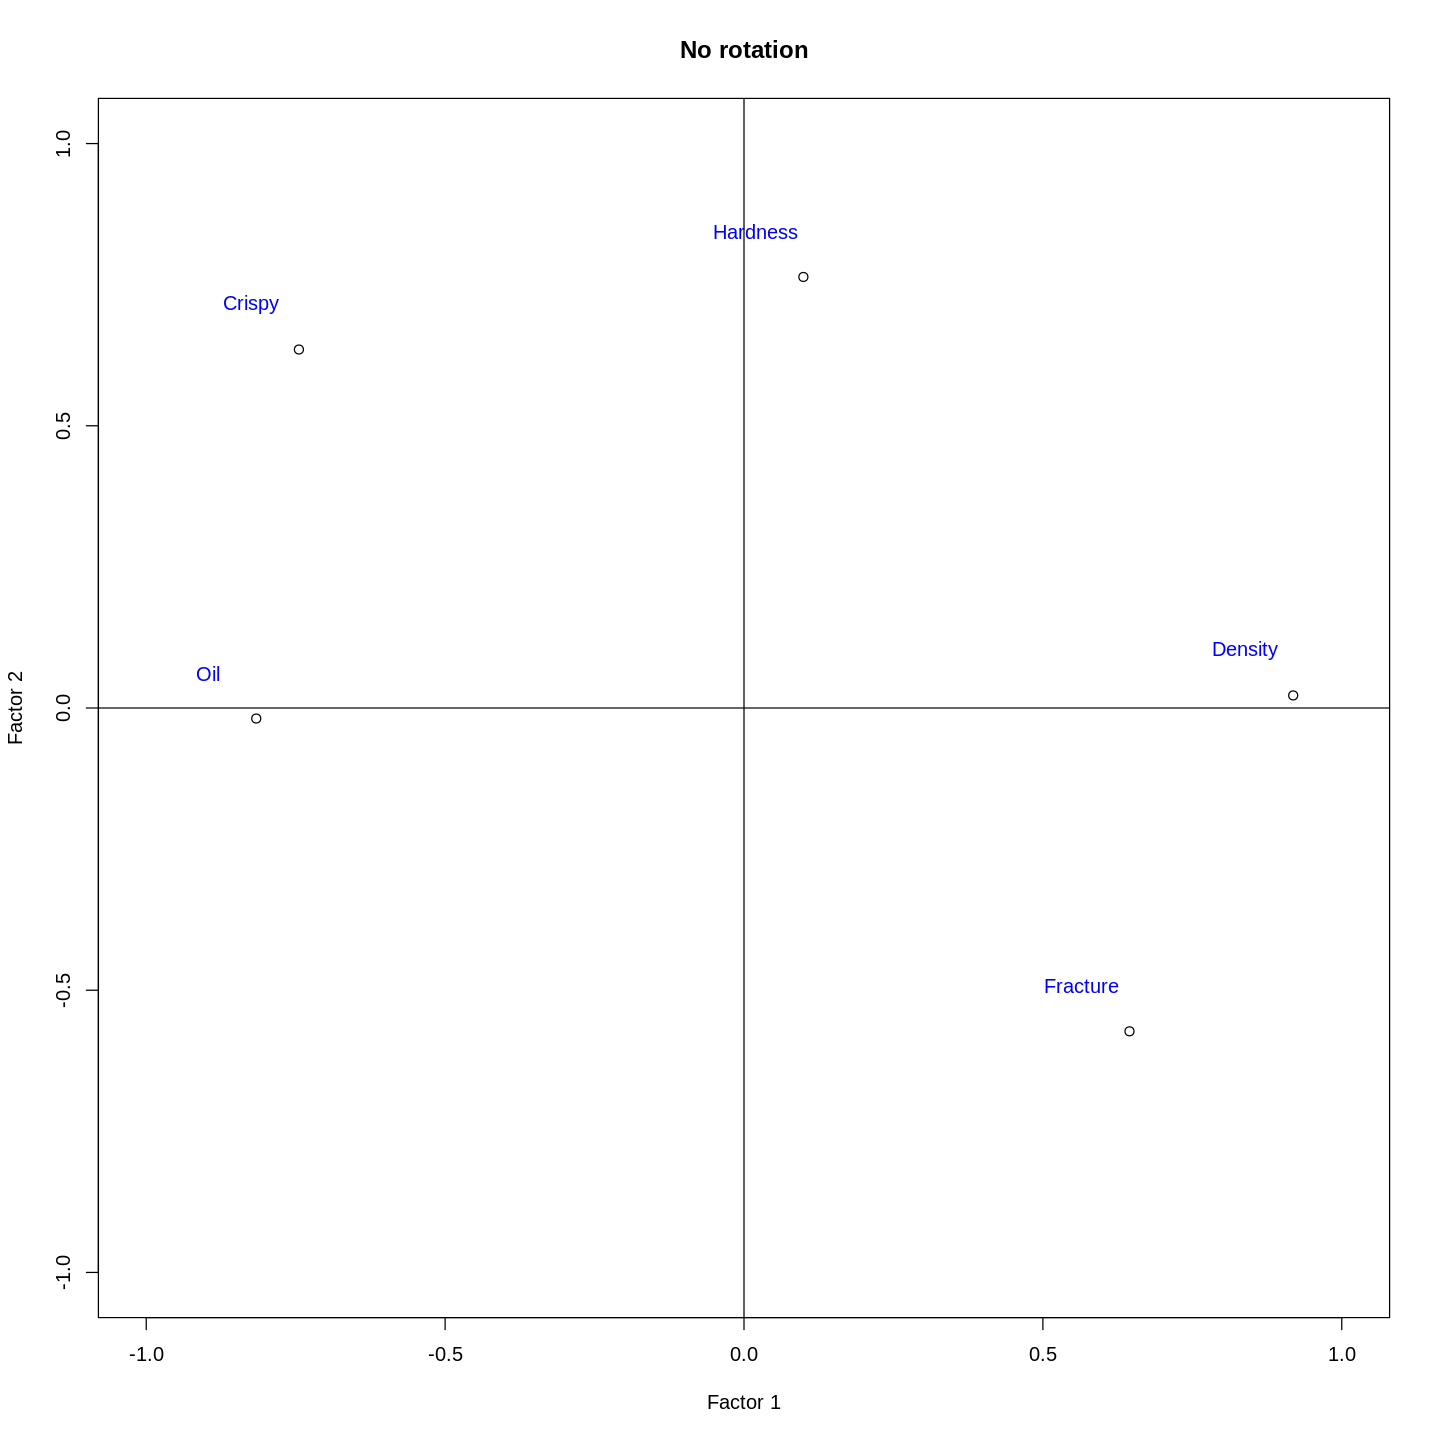

In [6]:
options(repr.plot.width=12, repr.plot.height=12)

plot(food.fa$loadings[,1], 
     food.fa$loadings[,2],
     xlab = "Factor 1", 
     ylab = "Factor 2", 
     ylim = c(-1,1),
     xlim = c(-1,1),
     main = "No rotation")
text(food.fa$loadings[,1]-0.08, 
     food.fa$loadings[,2]+0.08,
      colnames(food),
      col="blue")

abline(h = 0, v = 0)


Taking a look on the figure above, it seems like the Factor 1 accounts for pastry, which is dense and can be bend a lot before it breaks, it also accounts for **less** crispy products (sign of Crispy loading for Factor 1) and less oily. 

Factor 2 seems to account for pastry that is crispy and hard to break apart. Also, the sign of the loading for Fracture is negative, meaning Factor 2 accounts for **less** flexible products. It doesn't seem to represent oil or density

Based on these observations, we could probably call the factors soft pastry (Factor 1) and hard pastry (Factor 2). 

Note that the communality values for oil and hardness are not too high. They are not represented too well by these two factors. 

In [7]:
loadings(food.fa)


Loadings:
         Factor1 Factor2
Oil      -0.816         
Density   0.919         
Crispy   -0.745   0.635 
Fracture  0.645  -0.573 
Hardness          0.764 

               Factor1 Factor2
SS loadings      2.490   1.316
Proportion Var   0.498   0.263
Cumulative Var   0.498   0.761